In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Importing The Required Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,ConfusionMatrixDisplay


In [3]:
df=pd.read_csv("Amazon Customer Behavior Survey.csv")
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


# **Pre Processing**

In [4]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.isna().sum()

Timestamp                                 0
age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     2
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas               

In [6]:
df.dtypes

Timestamp                                 object
age                                        int64
Gender                                    object
Purchase_Frequency                        object
Purchase_Categories                       object
Personalized_Recommendation_Frequency     object
Browsing_Frequency                        object
Product_Search_Method                     object
Search_Result_Exploration                 object
Customer_Reviews_Importance                int64
Add_to_Cart_Browsing                      object
Cart_Completion_Frequency                 object
Cart_Abandonment_Factors                  object
Saveforlater_Frequency                    object
Review_Left                               object
Review_Reliability                        object
Review_Helpfulness                        object
Personalized_Recommendation_Frequency      int64
Recommendation_Helpfulness                object
Rating_Accuracy                            int64
Shopping_Satisfactio

In [7]:
df.drop(['Timestamp'],inplace=True,axis=1)
df

,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,Add_to_Cart_Browsing,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,Yes,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,Yes,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,Maybe,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,Yes,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,Maybe,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,Maybe,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,Maybe,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,Yes,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [8]:
df=df.dropna()

In [9]:
df1=df.copy()#copying df for clustering

In [10]:
df.isna().sum()

age                                       0
Gender                                    0
Purchase_Frequency                        0
Purchase_Categories                       0
Personalized_Recommendation_Frequency     0
Browsing_Frequency                        0
Product_Search_Method                     0
Search_Result_Exploration                 0
Customer_Reviews_Importance               0
Add_to_Cart_Browsing                      0
Cart_Completion_Frequency                 0
Cart_Abandonment_Factors                  0
Saveforlater_Frequency                    0
Review_Left                               0
Review_Reliability                        0
Review_Helpfulness                        0
Personalized_Recommendation_Frequency     0
Recommendation_Helpfulness                0
Rating_Accuracy                           0
Shopping_Satisfaction                     0
Service_Appreciation                      0
Improvement_Areas                         0
dtype: int64

In [11]:
#splliting age in to different catogories
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['15-25', '25-35', '35-45', '45-55', '55+']

# Create a new column 'Age Category' with the grouped age categories
df["age"] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

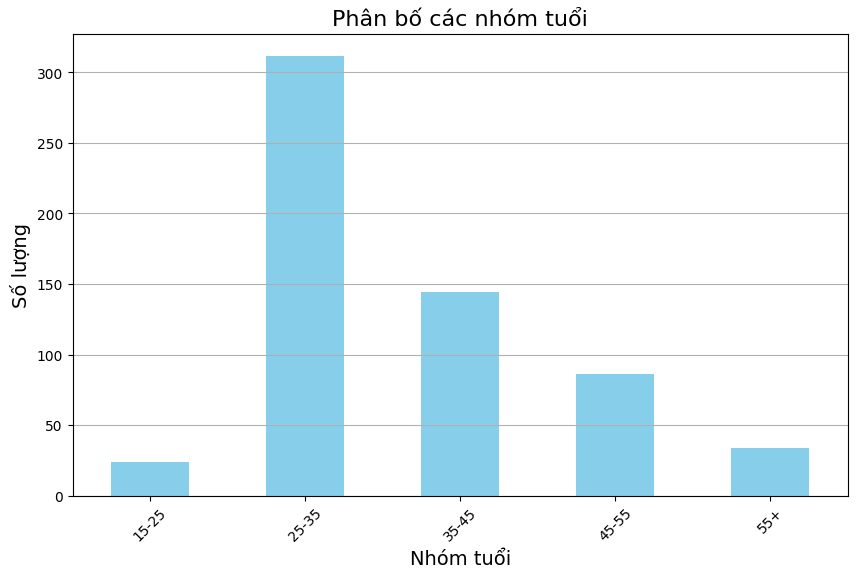

In [12]:
age_group_counts = df['age'].value_counts().sort_index()

# --- Biểu đồ cột (Bar Chart) ---
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Phân bố các nhóm tuổi', fontsize=16)
plt.xlabel('Nhóm tuổi', fontsize=14)
plt.ylabel('Số lượng', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [13]:
df.dtypes

age                                       category
Gender                                      object
Purchase_Frequency                          object
Purchase_Categories                         object
Personalized_Recommendation_Frequency       object
Browsing_Frequency                          object
Product_Search_Method                       object
Search_Result_Exploration                   object
Customer_Reviews_Importance                  int64
Add_to_Cart_Browsing                        object
Cart_Completion_Frequency                   object
Cart_Abandonment_Factors                    object
Saveforlater_Frequency                      object
Review_Left                                 object
Review_Reliability                          object
Review_Helpfulness                          object
Personalized_Recommendation_Frequency        int64
Recommendation_Helpfulness                  object
Rating_Accuracy                              int64
Shopping_Satisfaction          

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lst=["age","Gender","Purchase_Categories","Purchase_Frequency","Personalized_Recommendation_Frequency","Recommendation_Helpfulness","Browsing_Frequency","Product_Search_Method","Search_Result_Exploration","Add_to_Cart_Browsing","Cart_Completion_Frequency","Cart_Abandonment_Factors","Saveforlater_Frequency","Review_Left","Review_Reliability","Review_Helpfulness","Service_Appreciation","Improvement_Areas"]
for i in lst:
  df[i]=le.fit_transform(df[i])

In [15]:
df.dtypes

age                                       int32
Gender                                    int32
Purchase_Frequency                        int32
Purchase_Categories                       int32
Personalized_Recommendation_Frequency     int32
Browsing_Frequency                        int32
Product_Search_Method                     int32
Search_Result_Exploration                 int32
Customer_Reviews_Importance               int64
Add_to_Cart_Browsing                      int32
Cart_Completion_Frequency                 int32
Cart_Abandonment_Factors                  int32
Saveforlater_Frequency                    int32
Review_Left                               int32
Review_Reliability                        int32
Review_Helpfulness                        int32
Personalized_Recommendation_Frequency     int64
Recommendation_Helpfulness                int32
Rating_Accuracy                           int64
Shopping_Satisfaction                     int64
Service_Appreciation                    

# **Exploratory Data Analysis**
Calculating features having high correlation


In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with high correlation
threshold = 0.5  # Adjust the threshold as needed
highly_correlated_features = np.where(np.abs(correlation_matrix) > threshold)

# Print the highly correlated features
for feature1, feature2 in zip(highly_correlated_features[0], highly_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are highly correlated.")

Rating_Accuracy  and Shopping_Satisfaction are highly correlated.
Shopping_Satisfaction and Rating_Accuracy  are highly correlated.


**Calculating features having low correlation**

In [17]:
#Calculate the correlation matrix
correlation_matrix = df.corr()

# Find features with low correlation
threshold = 0.0009  # Adjust the threshold as needed
low_correlated_features = np.where(np.abs(correlation_matrix) < threshold)

# Print the low correlated features
for feature1, feature2 in zip(low_correlated_features[0], low_correlated_features[1]):
    if feature1 != feature2:
        print(f"{df.columns[feature1]} and {df.columns[feature2]} are low correlated.")

Browsing_Frequency and Shopping_Satisfaction are low correlated.
Shopping_Satisfaction and Browsing_Frequency are low correlated.


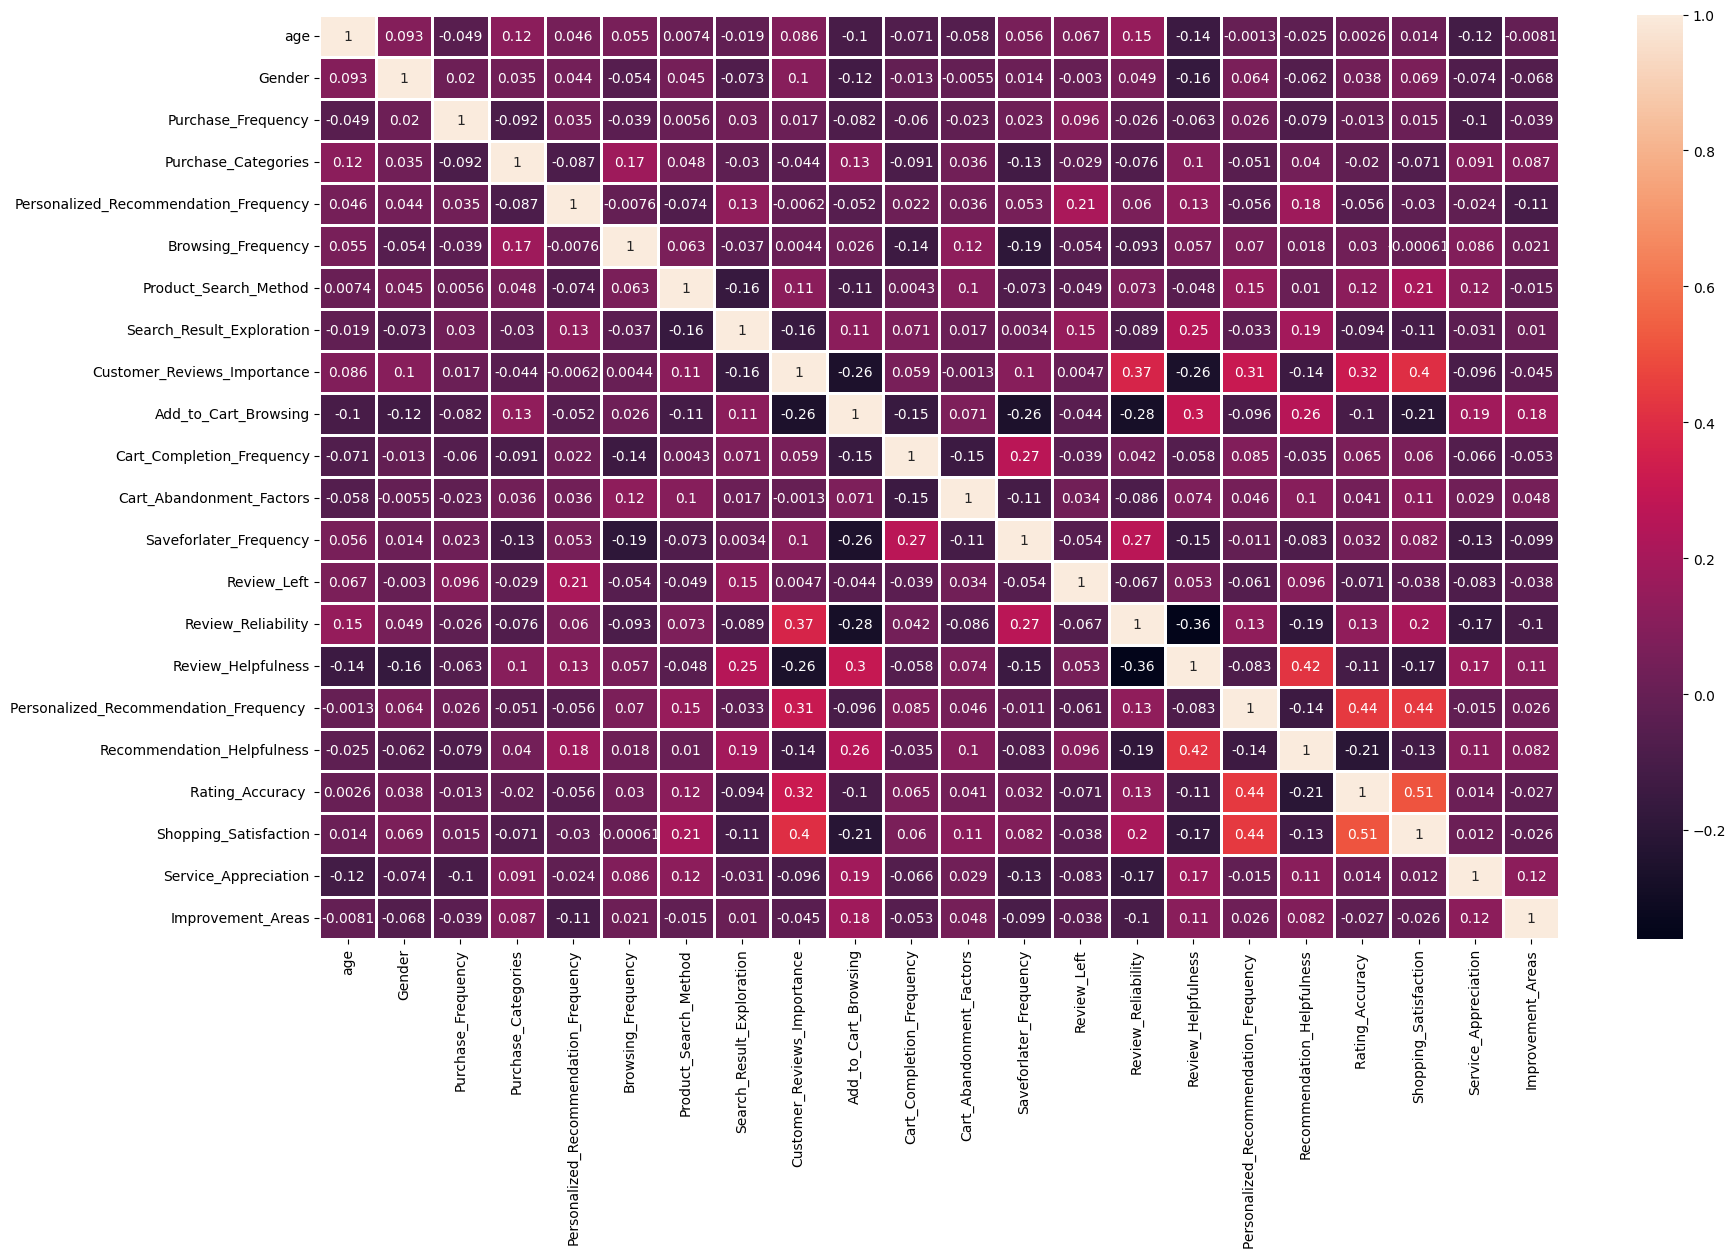

In [18]:
#correlation between variables
#heat map
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1,figsize=(20,12))
sns.heatmap(df.corr(),annot=True,linewidths=1)
plt.show()

<Axes: xlabel='Review_Reliability', ylabel='count'>

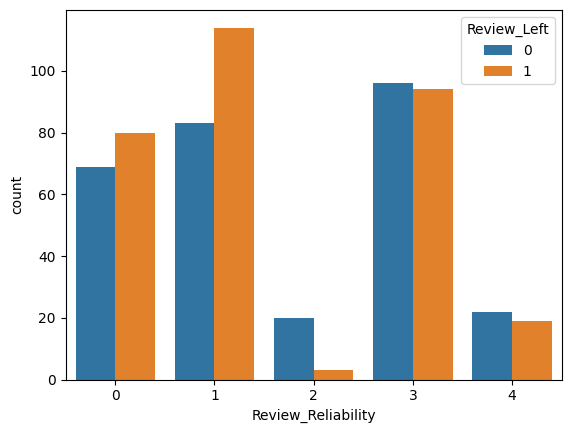

In [33]:
sns.countplot(x='Review_Reliability',data=df,hue='Review_Left')

0 đại diện cho những người chưa để lại đánh giá nào và 1 đại diện cho những người đã để lại đánh giá

những người tiếp tục đánh giá có phạm vi "Rất hài lòng", "Hài lòng", "Trung bình", "Không hài lòng" và "Rất không hài lòng"

Dựa trên biểu đồ, có vẻ như những cá nhân hài lòng với sản phẩm hoặc dịch vụ có nhiều khả năng để lại đánh giá hơn. Biểu đồ cho thấy những người đánh giá trải nghiệm của họ là "Rất hài lòng" hoặc "Hài lòng" có tần suất để lại đánh giá cao hơn. Mặt khác, những cá nhân không hài lòng hoặc có ý kiến ​​trung bình sẽ ít để lại đánh giá hơn.

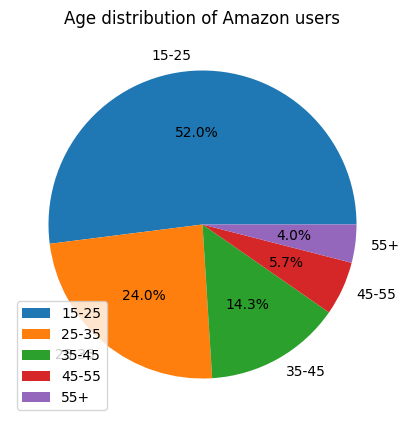

In [20]:
# Age distribution
y=df['age'].value_counts()
plt.figure(figsize=(5,5))
labels=['15-25', '25-35', '35-45', '45-55', '55+']
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Độ tuổi khách hàng mua sắm')
plt.show()

Based on the graph, it can be inferred that individuals in the age range of 0-20 have a higher level of user interaction compared to other age groups. This implies that individuals within this age range are more engagements

<Axes: xlabel='Purchase_Frequency', ylabel='count'>

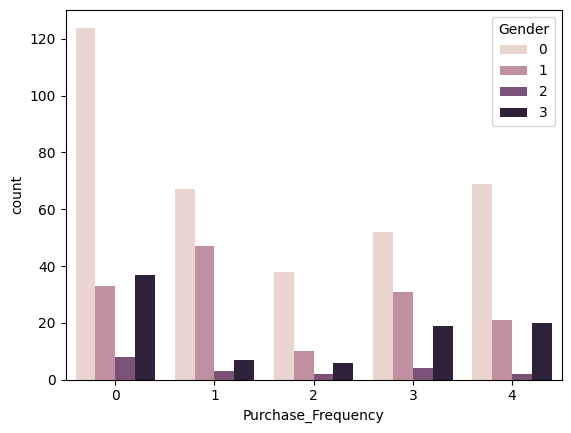

In [21]:
# plan
sns.countplot(x='Purchase_Frequency',data=df,hue='Gender')

0 represent people who identify as females,1 represent people who identify as male,2 represent people who preffered not to tell their gender,3 represent people who identify in other genders.The browsing frequency is categorized as"Multiple times a day", "Multiple times a week, "Few times a month," "Once a month," and "Less than once a month.".Here female population is more active in the purchase than of other genders

# **Feature selection**

In [22]:
X=df.drop(["Recommendation_Helpfulness"],axis=1)
y=df.iloc[:,-5]

In [23]:
df['Recommendation_Helpfulness'].value_counts()

Recommendation_Helpfulness
1    272
0    171
2    157
Name: count, dtype: int64

**Selecting the best features for classification using ANOVA**

In [24]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the selected feature indices
feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]
# Print the selected features
print(selected_features)

Index(['Personalized_Recommendation_Frequency', 'Search_Result_Exploration',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Rating_Accuracy ',
       'Shopping_Satisfaction'],
      dtype='object')


In [25]:
xnew=df.drop(['age', 'Gender','Purchase_Frequency', 'Purchase_Categories', 'Browsing_Frequency','Product_Search_Method', 'Customer_Reviews_Importance','Cart_Abandonment_Factors', 'Saveforlater_Frequency','Recommendation_Helpfulness',"Service_Appreciation","Improvement_Areas"],axis=1)


In [26]:
from imblearn.over_sampling import RandomOverSampler
sm=RandomOverSampler()
x,y=sm.fit_resample(xnew,y)

In [27]:
#minmaxscaler
ms=MinMaxScaler()
Xsc=ms.fit_transform(x)
Xsc

array([[1.  , 1.  , 1.  , ..., 0.25, 0.  , 0.  ],
       [1.  , 1.  , 1.  , ..., 0.25, 0.5 , 0.25],
       [0.  , 1.  , 1.  , ..., 0.75, 0.5 , 0.5 ],
       ...,
       [0.5 , 1.  , 0.  , ..., 0.5 , 0.5 , 0.5 ],
       [0.  , 1.  , 0.5 , ..., 0.75, 0.75, 0.75],
       [0.5 , 0.  , 0.5 , ..., 0.25, 0.25, 0.25]])

In [28]:
#splitting to test and train data
X_train,X_test,y_train,y_test=train_test_split(Xsc,y,test_size=0.1,random_state=4)

# **Model Building**

**RandomForest Classifier**

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy'],'max_depth': [None, 5, 10],'min_samples_split': [1, 4],'min_samples_leaf': [1, 3]}
rfc = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


best_rfc = RandomForestClassifier(**best_params)

best_rfc.fit(X_train, y_train)

y_pred = best_rfc.predict(X_test)

accuracy = best_rfc.score(X_test, y_test)

print("Best Parameters:", best_params)
print("Best Score:", best_score)
print("Test Accuracy:", accuracy)
print(classification_report(y_test,y_pred))


Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
Best Score: 0.7602739726027397
Test Accuracy: 0.8048780487804879
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.79      0.76      0.78        25
           2       0.86      0.84      0.85        37

    accuracy                           0.80        82
   macro avg       0.79      0.80      0.80        82
weighted avg       0.81      0.80      0.81        82



In [30]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 4,n_estimators= 200)
rf.fit(X_train,y_train)
y_pred1=rf.predict(X_test)
y_pred1

array([0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2,
       2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1,
       2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 1, 1])

In [31]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79        20
           1       0.74      0.68      0.71        25
           2       0.86      0.84      0.85        37

    accuracy                           0.79        82
   macro avg       0.78      0.79      0.78        82
weighted avg       0.79      0.79      0.79        82



### Hyper Parameter Bayes

In [32]:
from skopt import BayesSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the hyperparameter space
param_space = {
    'n_estimators': [100, 200, 300],  # or use space.Integer(100, 300) for a range
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],  # or space.Integer(5, 50)
    'min_samples_split': [2, 4],  # range can be extended if needed
    'min_samples_leaf': [1, 3]   # range can be extended if needed
}

# Create the RandomForestClassifier
rfc = RandomForestClassifier()

# Create the Bayesian search object and fit it to the training data
bayes_search = BayesSearchCV(estimator=rfc, search_spaces=param_space, n_iter=32, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the Bayesian optimization search
bayes_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = bayes_search.best_params_
best_score = bayes_search.best_score_

# Train a new RandomForestClassifier with the best parameters
best_rfc = RandomForestClassifier(**best_params)
best_rfc.fit(X_train, y_train)

# Predict on the test set
y_pred2 = best_rfc.predict(X_test)

# Evaluate the model
accuracy = best_rfc.score(X_test, y_test)
print("Best Parameters:", best_params)
print("Best Score from CV:", best_score)
print("Test Accuracy:", accuracy)
print(classification_report(y_test, y_pred2))


Best Parameters: OrderedDict({'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200})
Best Score from CV: 0.7657254682694996
Test Accuracy: 0.7926829268292683
              precision    recall  f1-score   support

           0       0.71      0.85      0.77        20
           1       0.81      0.68      0.74        25
           2       0.84      0.84      0.84        37

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.78        82
weighted avg       0.80      0.79      0.79        82

